### Ch5_2_1.py

In [26]:
import pandas as pd

df = pd.read_csv("./diabetes.csv")

print(df.head())
df.head().to_html("./Ch5_2_1.html")
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


### Ch5_2_2.py

90 = 8*10 + 10

88 = 10*8 + 8

 9 = 8*1 + 1

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成輸入的訓練資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()  # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
# 訓練模型
model.fit(X, Y, epochs=150, batch_size=10)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
768/768 [==============================] - 1s 755us/step - loss: 5.5946 - acc: 0.6432
Epoch 2/150
768/768 [==============================] - 0s 146us/step - loss: 5.6245 - acc: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 161us/step - loss: 5.6245 - acc: 0

### Ch5_2_3.py

* Standardization

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd",
              metrics=["accuracy"]) 
# 訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

Using TensorFlow backend.


768/768 [==============================] - 0s 41us/step
準確度 = 0.79


### Ch5_2_3a.py

* model.add(Dense(2, activation="softmax"))
* model.add(Dense(1, activation="sigmoid"))

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成輸入資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

768/768 [==============================] - 0s 41us/step
準確度 = 0.81


### Ch5_2_3b.py
* kernel_initializer, bias_initializer

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,),
                kernel_initializer="random_uniform", 
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(8, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="relu"))
model.add(Dense(2, kernel_initializer="random_uniform",
                bias_initializer="ones",
                activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))


### Ch5_2_3c.py
* adam

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

### Ch5_2_3d.py
* model.add(Dense(6, activation="relu")) ...reduce neurons to improve accuracy for small dataset !!! 

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X, Y)
print("準確度 = {:.2f}".format(accuracy))

### Ch5_2_4.py
* training set and test set

In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

690/690 [==============================] - 0s 45us/step
訓練資料集的準確度 = 0.83
78/78 [==============================] - 0s 26us/step
測試資料集的準確度 = 0.74


* overfitting...

### Ch5_2_4a.py
* history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=10)

In [11]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=150, batch_size=10)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Train on 690 samples, validate on 78 samples
Epoch 1/150
690/690 [==============================] - 0s 386us/step - loss: 0.6521 - accuracy: 0.6420 - val_loss: 0.6348 - val_accuracy: 0.7051
Epoch 2/150
690/690 [==============================] - 0s 229us/step - loss: 0.5905 - accuracy: 0.6913 - val_loss: 0.5946 - val_accuracy: 0.7051
Epoch 3/150
690/690 [==============================] - 0s 144us/step - loss: 0.5453 - accuracy: 0.7145 - val_loss: 0.5700 - val_accuracy: 0.7179
Epoch 4/150
690/690 [==============================] - 0s 89us/step - loss: 0.5147 - accuracy: 0.7493 - val_loss: 0.5575 - val_accuracy: 0.7308
Epoch 5/150
690/690 [==============================] - 0s 96us/step - loss: 0.4953 - accuracy: 0.7652 - val_loss: 0.5507 - val_accuracy: 0.7179
Epoch 6/150
690/690 [==============================] - 0s 95us/step - loss: 0.4839 - accuracy: 0.7812 - val_loss: 0.5480 - val_accuracy: 0.7179
Epoch 7/150
690/690 [==============================] - 0s 108us/step - loss: 0.4764 - ac

690/690 [==============================] - 0s 99us/step - loss: 0.4218 - accuracy: 0.8058 - val_loss: 0.5695 - val_accuracy: 0.7692
Epoch 58/150
690/690 [==============================] - 0s 109us/step - loss: 0.4209 - accuracy: 0.8072 - val_loss: 0.5714 - val_accuracy: 0.7692
Epoch 59/150
690/690 [==============================] - 0s 90us/step - loss: 0.4215 - accuracy: 0.7986 - val_loss: 0.5712 - val_accuracy: 0.7821
Epoch 60/150
690/690 [==============================] - 0s 98us/step - loss: 0.4204 - accuracy: 0.8087 - val_loss: 0.5740 - val_accuracy: 0.7821
Epoch 61/150
690/690 [==============================] - 0s 95us/step - loss: 0.4210 - accuracy: 0.8116 - val_loss: 0.5770 - val_accuracy: 0.7821
Epoch 62/150
690/690 [==============================] - 0s 98us/step - loss: 0.4193 - accuracy: 0.8014 - val_loss: 0.5738 - val_accuracy: 0.7564
Epoch 63/150
690/690 [==============================] - 0s 94us/step - loss: 0.4198 - accuracy: 0.8014 - val_loss: 0.5757 - val_accuracy: 0.76

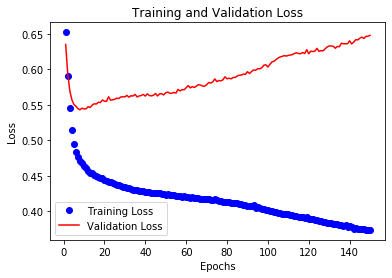

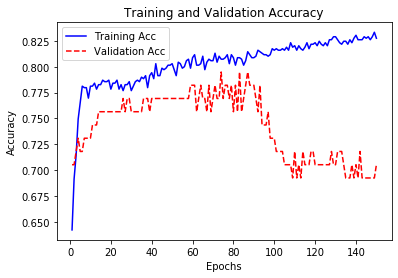

In [12]:
# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* overfitting after ~10 epochs

### Ch5_2_4b.py

* improve by changing to epochs=10

690/690 [==============================] - 0s 12us/step
訓練資料集的準確度 = 0.77
78/78 [==============================] - 0s 25us/step
測試資料集的準確度 = 0.74


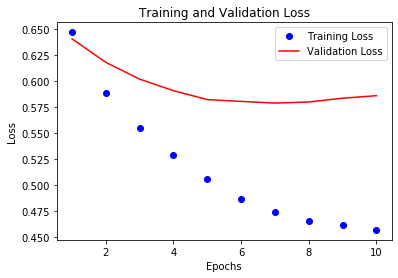

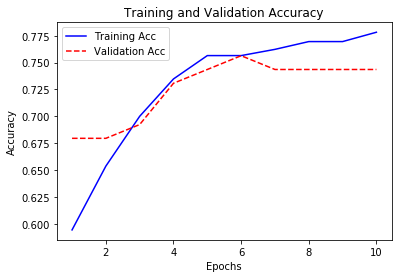

In [15]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
          epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失的圖表
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch5_2_4c.py
* history = model.fit(X_train, Y_train, validation_split=0.2, epochs=14, batch_size=10)

690/690 [==============================] - 0s 11us/step
訓練資料集的準確度 = 0.78
78/78 [==============================] - 0s 28us/step
測試資料集的準確度 = 0.78


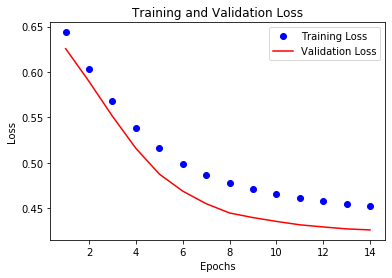

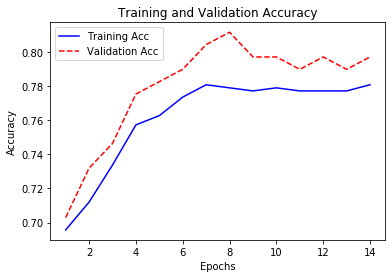

In [17]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=14, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch5_2_5.py
* Y_pred = model.predict(X_test, batch_size=10, verbose=0)

In [22]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict(X_test, batch_size=10, verbose=0)
print(len(X_test), len(Y_pred))
print(Y_pred[0])

690/690 [==============================] - 0s 43us/step
訓練資料集的準確度 = 0.79
78/78 [==============================] - 0s 91us/step
測試資料集的準確度 = 0.72
78 78
[0.929301   0.07069892]


### Ch5_2_5a.py
* model.add(Dense(1, activation="sigmoid"))
* Y_pred = model.predict(X_test, batch_size=10, verbose=0)

In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict(X_test, batch_size=10, verbose=0)
print(Y_pred[0])

690/690 [==============================] - 0s 40us/step
訓練資料集的準確度 = 0.78
78/78 [==============================] - 0s 24us/step
測試資料集的準確度 = 0.74
[0.10330468]


### Ch5_2_5b.py
* Y_pred = model.predict_classes(X_test, batch_size=10, verbose=0)

In [24]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
Y_pred = model.predict_classes(X_test, batch_size=10, verbose=0)
print(Y_pred[0], Y_pred[1])

690/690 [==============================] - 0s 42us/step
訓練資料集的準確度 = 0.76
78/78 [==============================] - 0s 115us/step
測試資料集的準確度 = 0.74
[0] [1]


### Ch5_4_1.py

In [25]:
import pandas as pd

# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")

print(df.head())
df.head().to_html("./Ch5_4_1.html")
print(df.shape)

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(506, 14)


### Ch5_4_2.py

In [28]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(7)  # 指定亂數種子
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:13]
Y = dataset[:, 13]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:404], Y[:404]     # 訓練資料前404筆
X_test, Y_test = X[404:], Y[404:]       # 測試資料後102筆
# 定義模型
def build_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(1))
    # 編譯模型
    model.compile(loss="mse", optimizer="adam", 
                  metrics=["mae"])
    return model

k = 4
nb_val_samples = len(X_train) // k
nb_epochs = 80
mse_scores = []
mae_scores = []
for i in range(k):
    print("Processing Fold #" + str(i))
    # 取出驗證資料集
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    # 結合出訓練資料集
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_model()
    # 訓練模型
    model.fit(X_train_p, Y_train_p, epochs=nb_epochs, 
              batch_size=16, verbose=0)
    # 評估模型
    mse, mae = model.evaluate(X_val, Y_val)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)

Processing Fold #0
101/101 [==============================] - 0s 194us/step
Processing Fold #1
101/101 [==============================] - 0s 186us/step
Processing Fold #2
101/101 [==============================] - 0s 173us/step
Processing Fold #3
101/101 [==============================] - 0s 167us/step
MSE_val:  26.30936054191967
MAE_val:  3.6235225200653076
102/102 [==============================] - 0s 27us/step
MSE_test:  13.835372307721306
MAE_test:  3.051739454269409


### Ch5_4_2a.py
* deeper model -> smaller error

In [31]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(7)  # 指定亂數種子
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:13]
Y = dataset[:, 13]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:404], Y[:404]     # 訓練資料前404筆
X_test, Y_test = X[404:], Y[404:]       # 測試資料後102筆
# 定義模型
def build_deep_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    # 編譯模型
    model.compile(loss="mse", optimizer="adam", 
                  metrics=["mae"])
    return model

k = 4
nb_val_samples = len(X_train) // k
nb_epochs = 80
mse_scores = []
mae_scores = []
for i in range(k):
    print("Processing Fold #" + str(i))
    # 取出驗證資料集
    X_val = X_train[i*nb_val_samples: (i+1)*nb_val_samples]
    Y_val = Y_train[i*nb_val_samples: (i+1)*nb_val_samples]
    # 結合出訓練資料集
    X_train_p = np.concatenate(
            [X_train[:i*nb_val_samples],
            X_train[(i+1)*nb_val_samples:]], axis=0)
    Y_train_p = np.concatenate(
            [Y_train[:i*nb_val_samples],
            Y_train[(i+1)*nb_val_samples:]], axis=0)
    model = build_deep_model()
    # 訓練模型
    model.fit(X_train_p, Y_train_p, epochs=nb_epochs, 
              batch_size=16, verbose=0)
    # 評估模型
    mse, mae = model.evaluate(X_val, Y_val)
    mse_scores.append(mse)
    mae_scores.append(mae)
    
print("MSE_val: ", np.mean(mse_scores))
print("MAE_val: ", np.mean(mae_scores))
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)


Processing Fold #0
101/101 [==============================] - 0s 181us/step
Processing Fold #1
101/101 [==============================] - 0s 192us/step
Processing Fold #2
101/101 [==============================] - 0s 205us/step
Processing Fold #3
101/101 [==============================] - 0s 209us/step
MSE_val:  18.175831184528842
MAE_val:  2.823735296726227
102/102 [==============================] - 0s 30us/step
MSE_test:  9.1564325912326
MAE_test:  2.2995479106903076


### Ch5_4_2b.py
* use all training data after finding the optimal parameters: model.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=0)

In [33]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(7)  # 指定亂數種子
# 載入波士頓房屋資料集
df = pd.read_csv("./boston_housing.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:13]
Y = dataset[:, 13]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割訓練和測試資料集
X_train, Y_train = X[:404], Y[:404]     # 訓練資料前404筆
X_test, Y_test = X[404:], Y[404:]       # 測試資料後102筆
# 定義模型
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
# 編譯模型
model.compile(loss="mse", optimizer="adam", 
              metrics=["mae"])
# 訓練模型
model.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=0)
# 使用測試資料評估模型
mse, mae = model.evaluate(X_test, Y_test)    
print("MSE_test: ", mse)
print("MAE_test: ", mae)

102/102 [==============================] - 0s 191us/step
MSE_test:  8.484634474212049
MAE_test:  2.182241439819336


### Ch5_5_1.py, Ch5_5_1a.py
* save model

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=14, batch_size=10)
# 顯示訓練和驗證損失
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 儲存模型結構
json_str = model.to_json()
with open("Ch5_5_1Model.config", "w") as text_file:
    text_file.write(json_str)
# 儲存模型權重
model.save_weights("Ch5_5_1Model.weight")

# 儲存模型結構+權重
model.save("Ch5_5_1a.h5")

### Ch5_5_2a.py, Ch5_5_2b.py
* load model

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 載入模型結構
from keras.models import model_from_json

model = Sequential()
with open("Ch5_5_1Model.config", "r") as text_file:
    json_str = text_file.read()
model = model_from_json(json_str)
# 載入權重
model.load_weights("Ch5_5_1Model.weight", by_name=False)
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
predict_values = model.predict(X_test, batch_size=10, verbose=0)
print(predict_values[0])

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 載入模型
from keras.models import load_model

model = Sequential()
model = load_model("Ch5_5_1a.h5")
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 測試資料集的預測值
predict_values = model.predict(X_test, batch_size=10, verbose=0)
print(predict_values[0])